## how to data analysis of ipl data

#### Loading the libraries 

In [2]:
# loading the libraries and dataset
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly.express as px
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#### import the dataset

In [4]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


#### Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

#### check the size of rows and columns of the dataset

In [11]:
df.shape
print(f"your rows are {df.shape[0]} and your columns are {df.shape[1]}")

your rows are 74 and your columns are 20


In [13]:
# check the null values
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

#### which team won the most matches?

In [20]:
# df.head()
match_won


match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of matches won by each team')

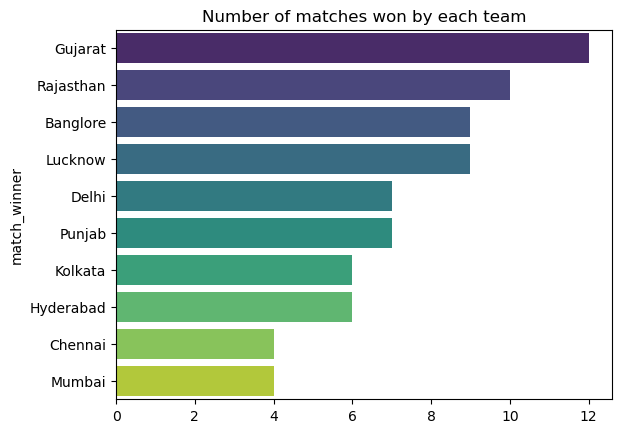

In [25]:
match_won = df['match_winner'].value_counts()
# sns.barplot(x=match_won.index, y=match_won.values)


# remove the overlaping of x-axis labels
# sns.barplot(y=match_won.index, x=match_won.values)

# change the color of the bars
sns.barplot(y=match_won.index, x=match_won.values, palette='viridis')
plt.title('Number of matches won by each team')

#### 2 Toos Decision Trends

Text(0.5, 1.0, 'Toss Decision Trends')

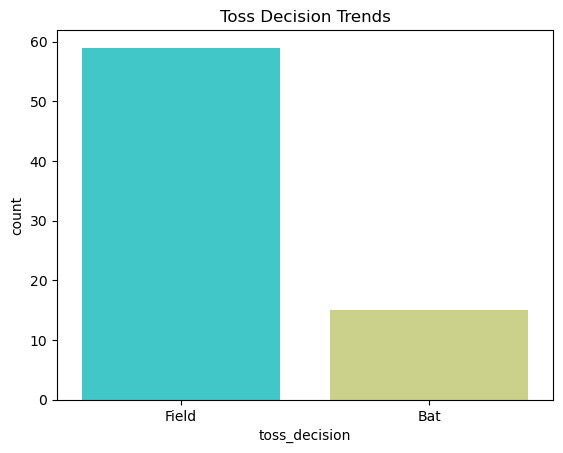

In [30]:
# df.head()
sns.countplot(x= df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Trends')

#### Toos Winner vs Match Winner

In [33]:
# df.head()

In [39]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count / df.shape[0]) * 100
print(f"Toss winner is also match winner {percentage:.2f}% of the times")

Toss winner is also match winner 48.65% of the times


#### How do team win ? (Runs vs Wicket)

<Axes: xlabel='won_by', ylabel='count'>

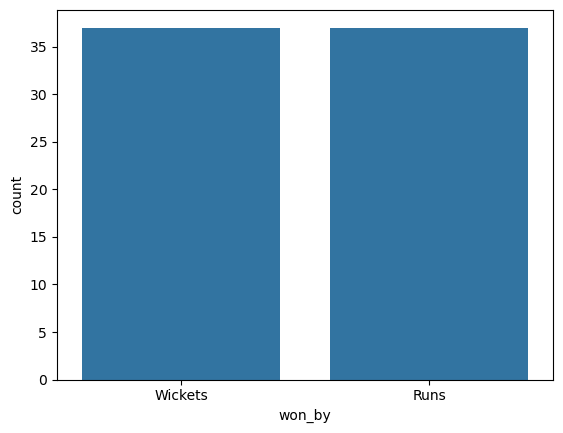

In [41]:
sns.countplot(x=df['won_by'])

#### key player performaces

In [62]:
# 1 most playr of the match awards
count = df['player_of_the_match'].value_counts().head(10)
# df.head()
count


player_of_the_match
Kuldeep Yadav      4
Jos Buttler        3
Umesh Yadav        2
Quinton de Kock    2
David Miller       2
Umran Malik        2
K L Rahul          2
Rahul Tripathi     2
Hardik Pandya      2
Jasprit Bumrah     2
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 players with most player of the match awards')

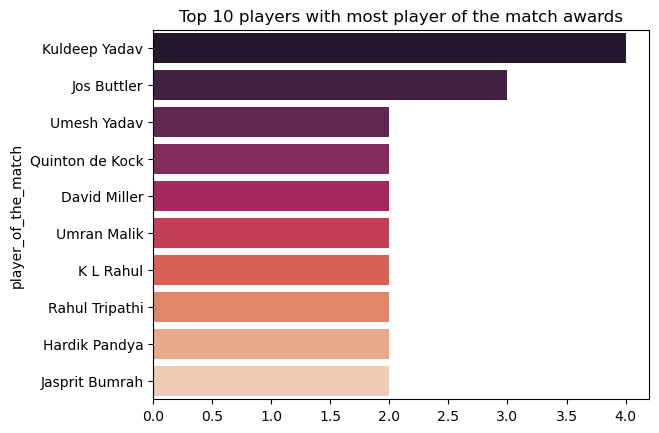

In [64]:
sns.barplot(y=count.index, x=count.values, palette='rocket')
plt.title('Top 10 players with most player of the match awards')

In [74]:
# 2 top scrorers
# df.head()
# top_scorers = df[['top_scorer','top_scorer_runs']].dropna()
top_scorers = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(5)
top_scorers

top_scorer
Jos Buttler        651
Quinton de Kock    377
KL Rahul           351
Shubman Gill       288
Faf du Plessis     257
Name: highscore, dtype: int64

<Axes: xlabel='top_scorer'>

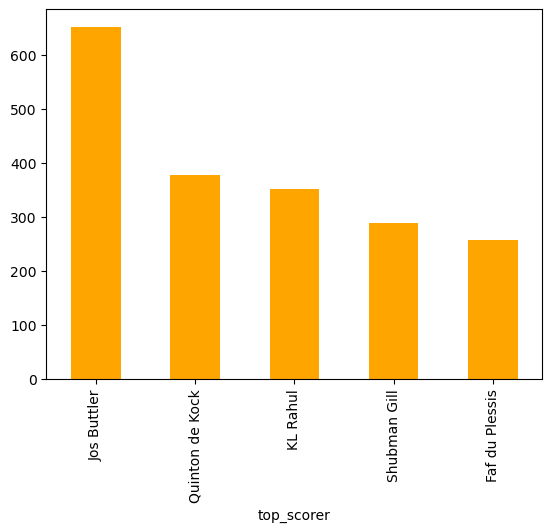

In [75]:
top_scorers.plot(kind='bar', color='orange')

<Axes: xlabel='best_bowling'>

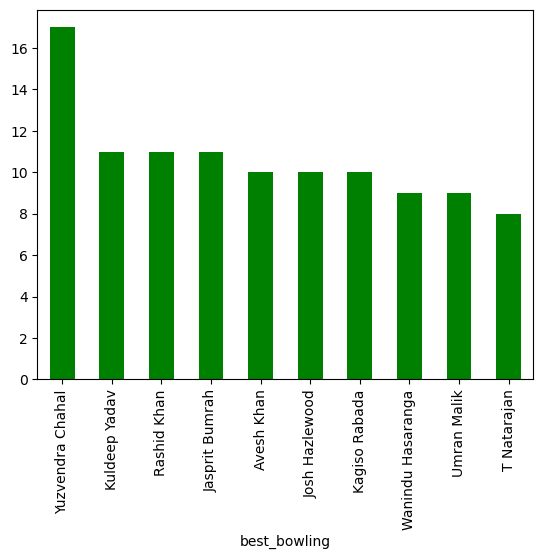

In [111]:
# 10 best bowlling figures
# df.head()
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers
top_bowlers.plot(kind='bar', color='green')


# sns.barplot(y=count.index, x=count.values, palette='rocket')


In [115]:
# most matches played by venue
venue_count = df['venue'].value_counts().head(10)
venue_count

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

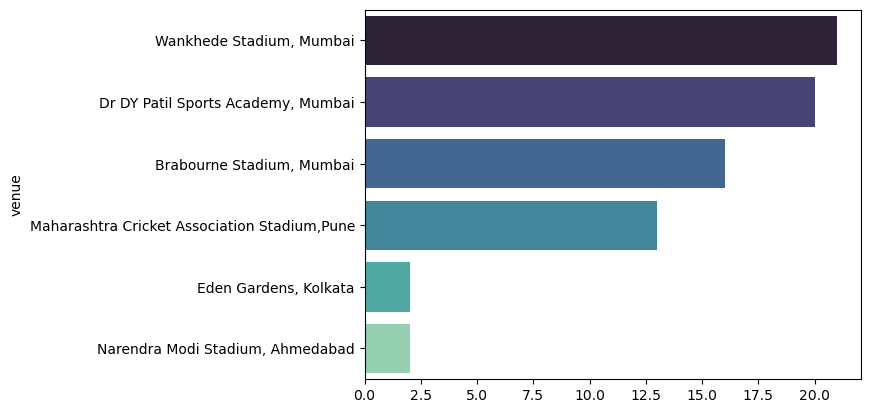

In [117]:
sns.barplot(y = venue_count.index, x= venue_count.values, palette='mako')

In [125]:
# who won the highest margin by runs?
df[df['won_by'] == 'Runs'].sort_values(by='margin', ascending=False).head(2)[['match_winner', 'margin']]

,match_winner,margin
54,Chennai,91
52,Lucknow,75


In [126]:
# which player had the highest individual score in a match?
df[['top_scorer', 'highscore']].sort_values(by='highscore', ascending=False).head(2)

,top_scorer,highscore
65,Quinton de Kock,140
33,Jos Buttler,116


In [127]:
# which bowler had the best bowling figure in a match?
df[['best_bowling', 'best_bowling_figure']].sort_values(by='best_bowling_figure', ascending=False).head(2)

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
